# Primates Hormone Induction Analysis

In [1]:
# This is the data path for the data file to be analyszed
data_path = '/Users/nises/Desktop/RA/2021-09-09_induction_hormone_immune.tsv'

In [2]:
#Importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data distribution

The total number of NHPs and features:  (110, 45).


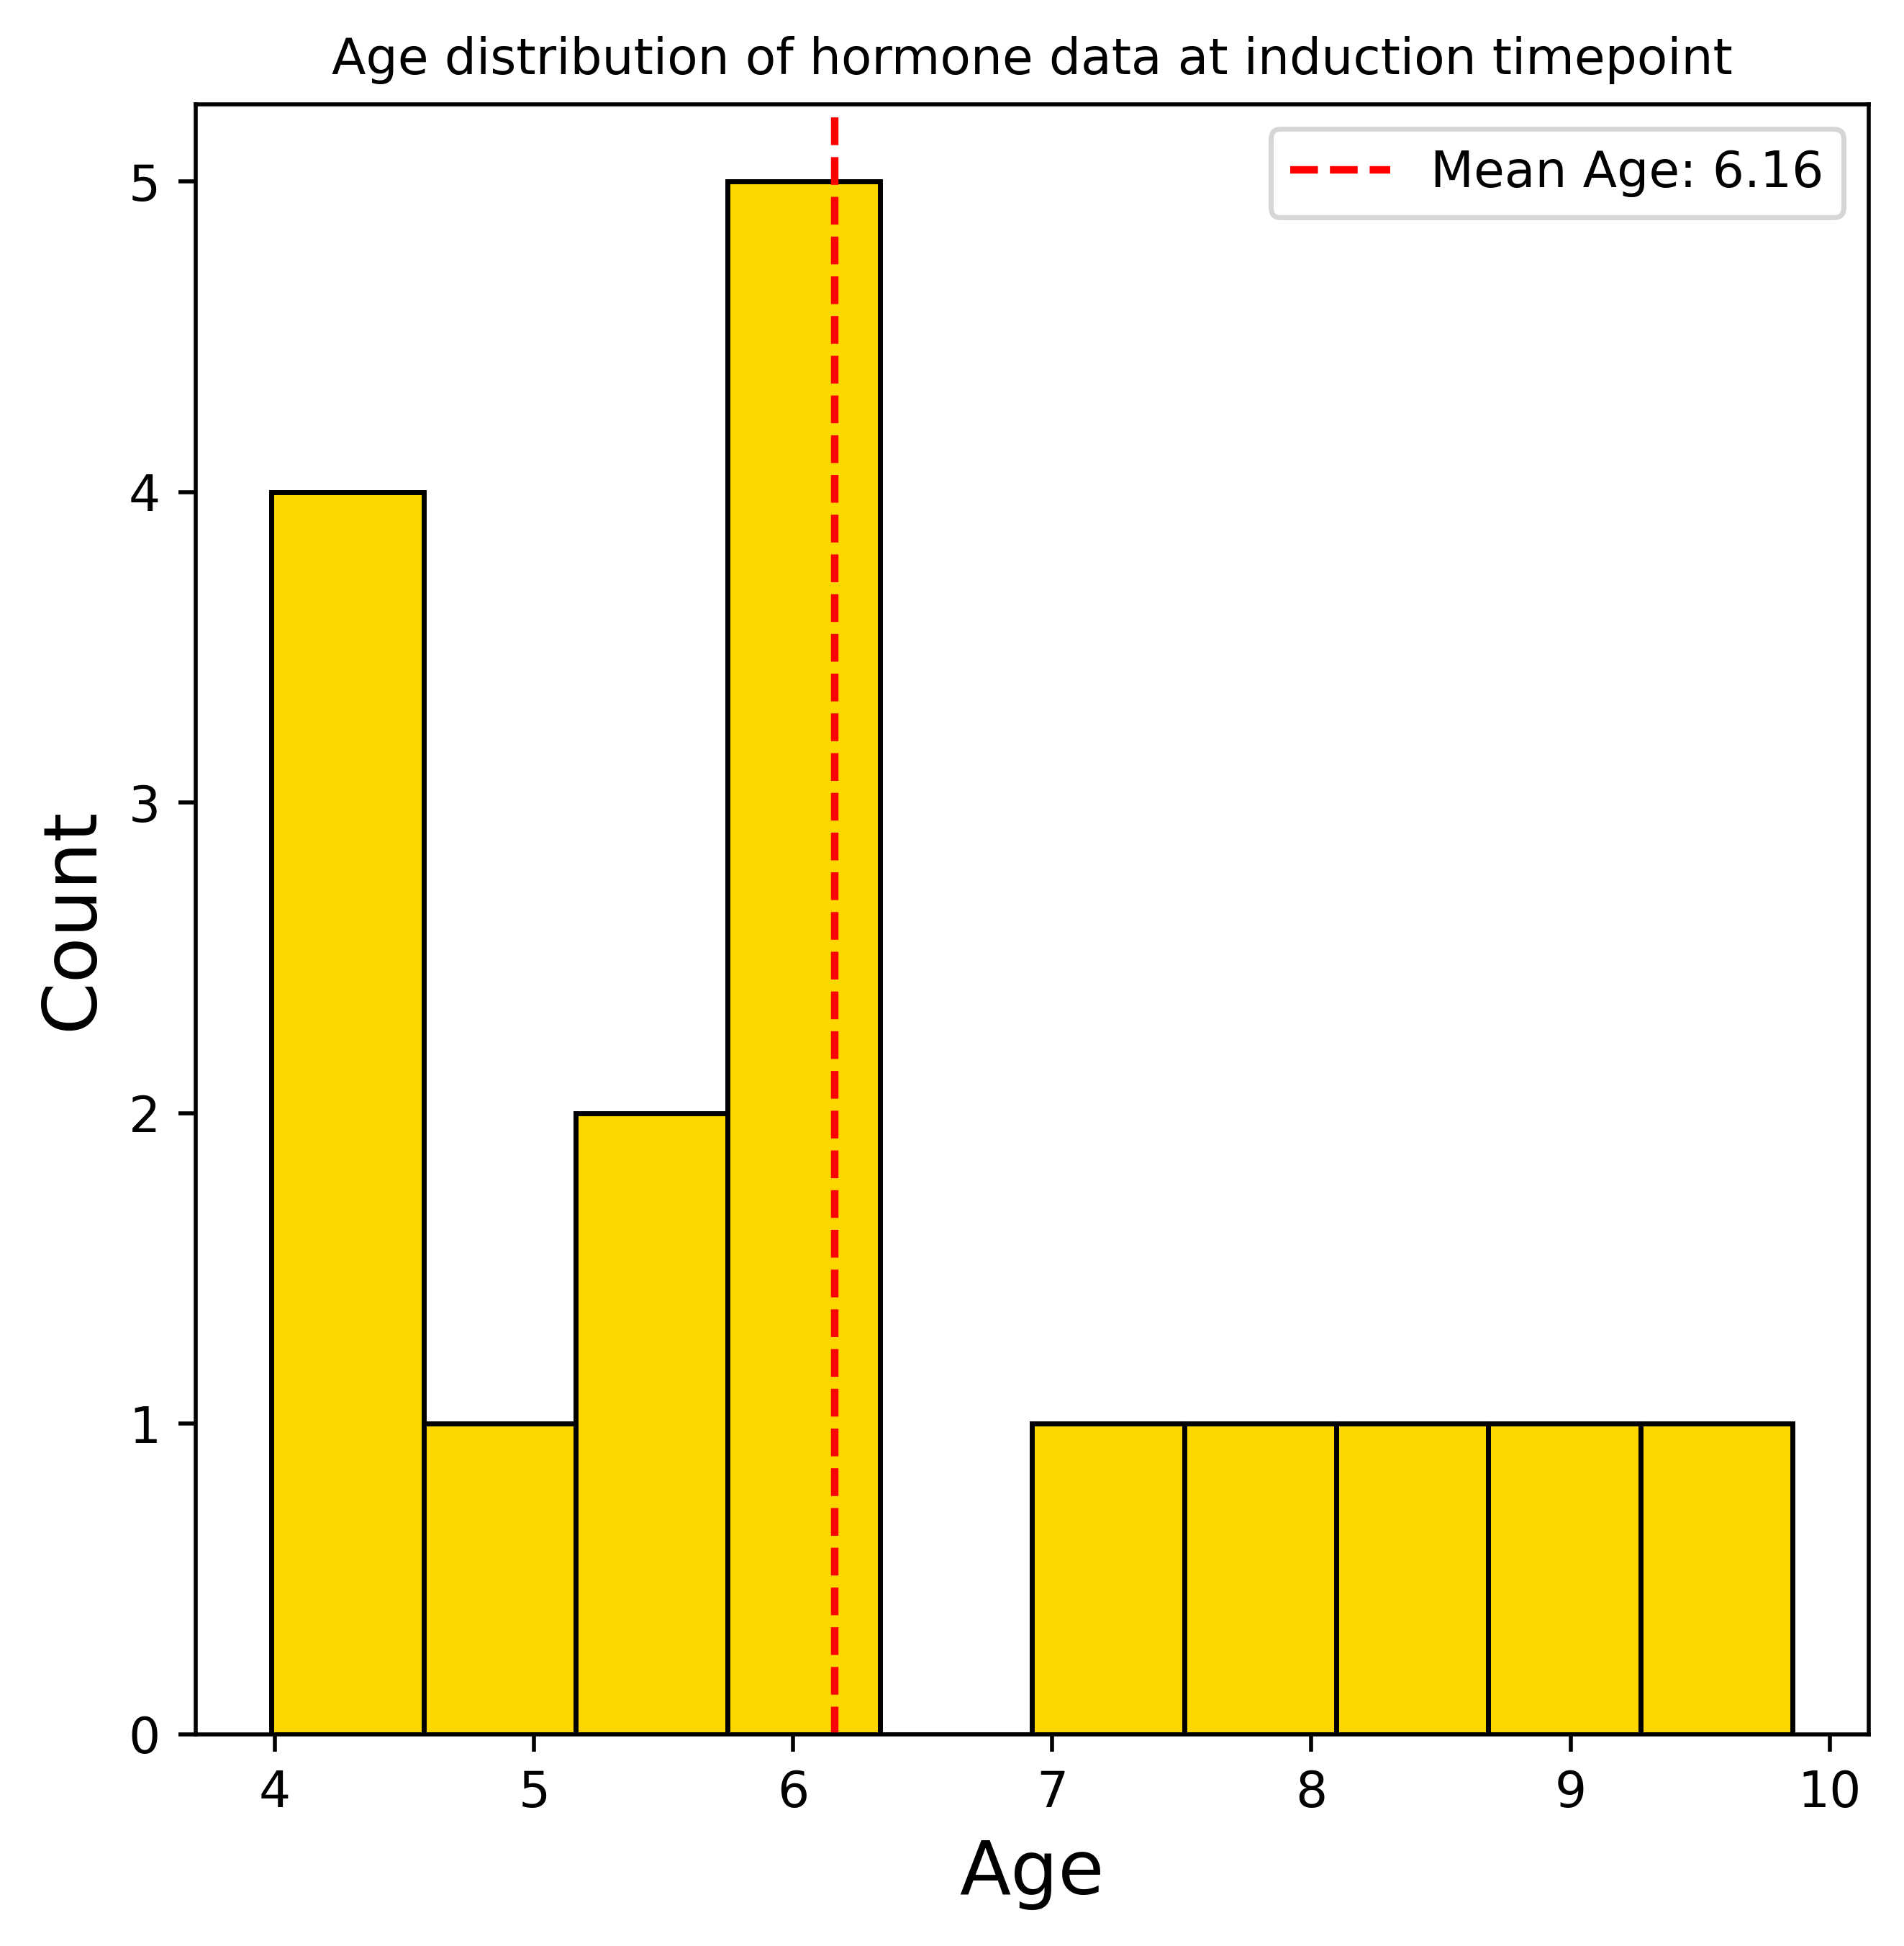

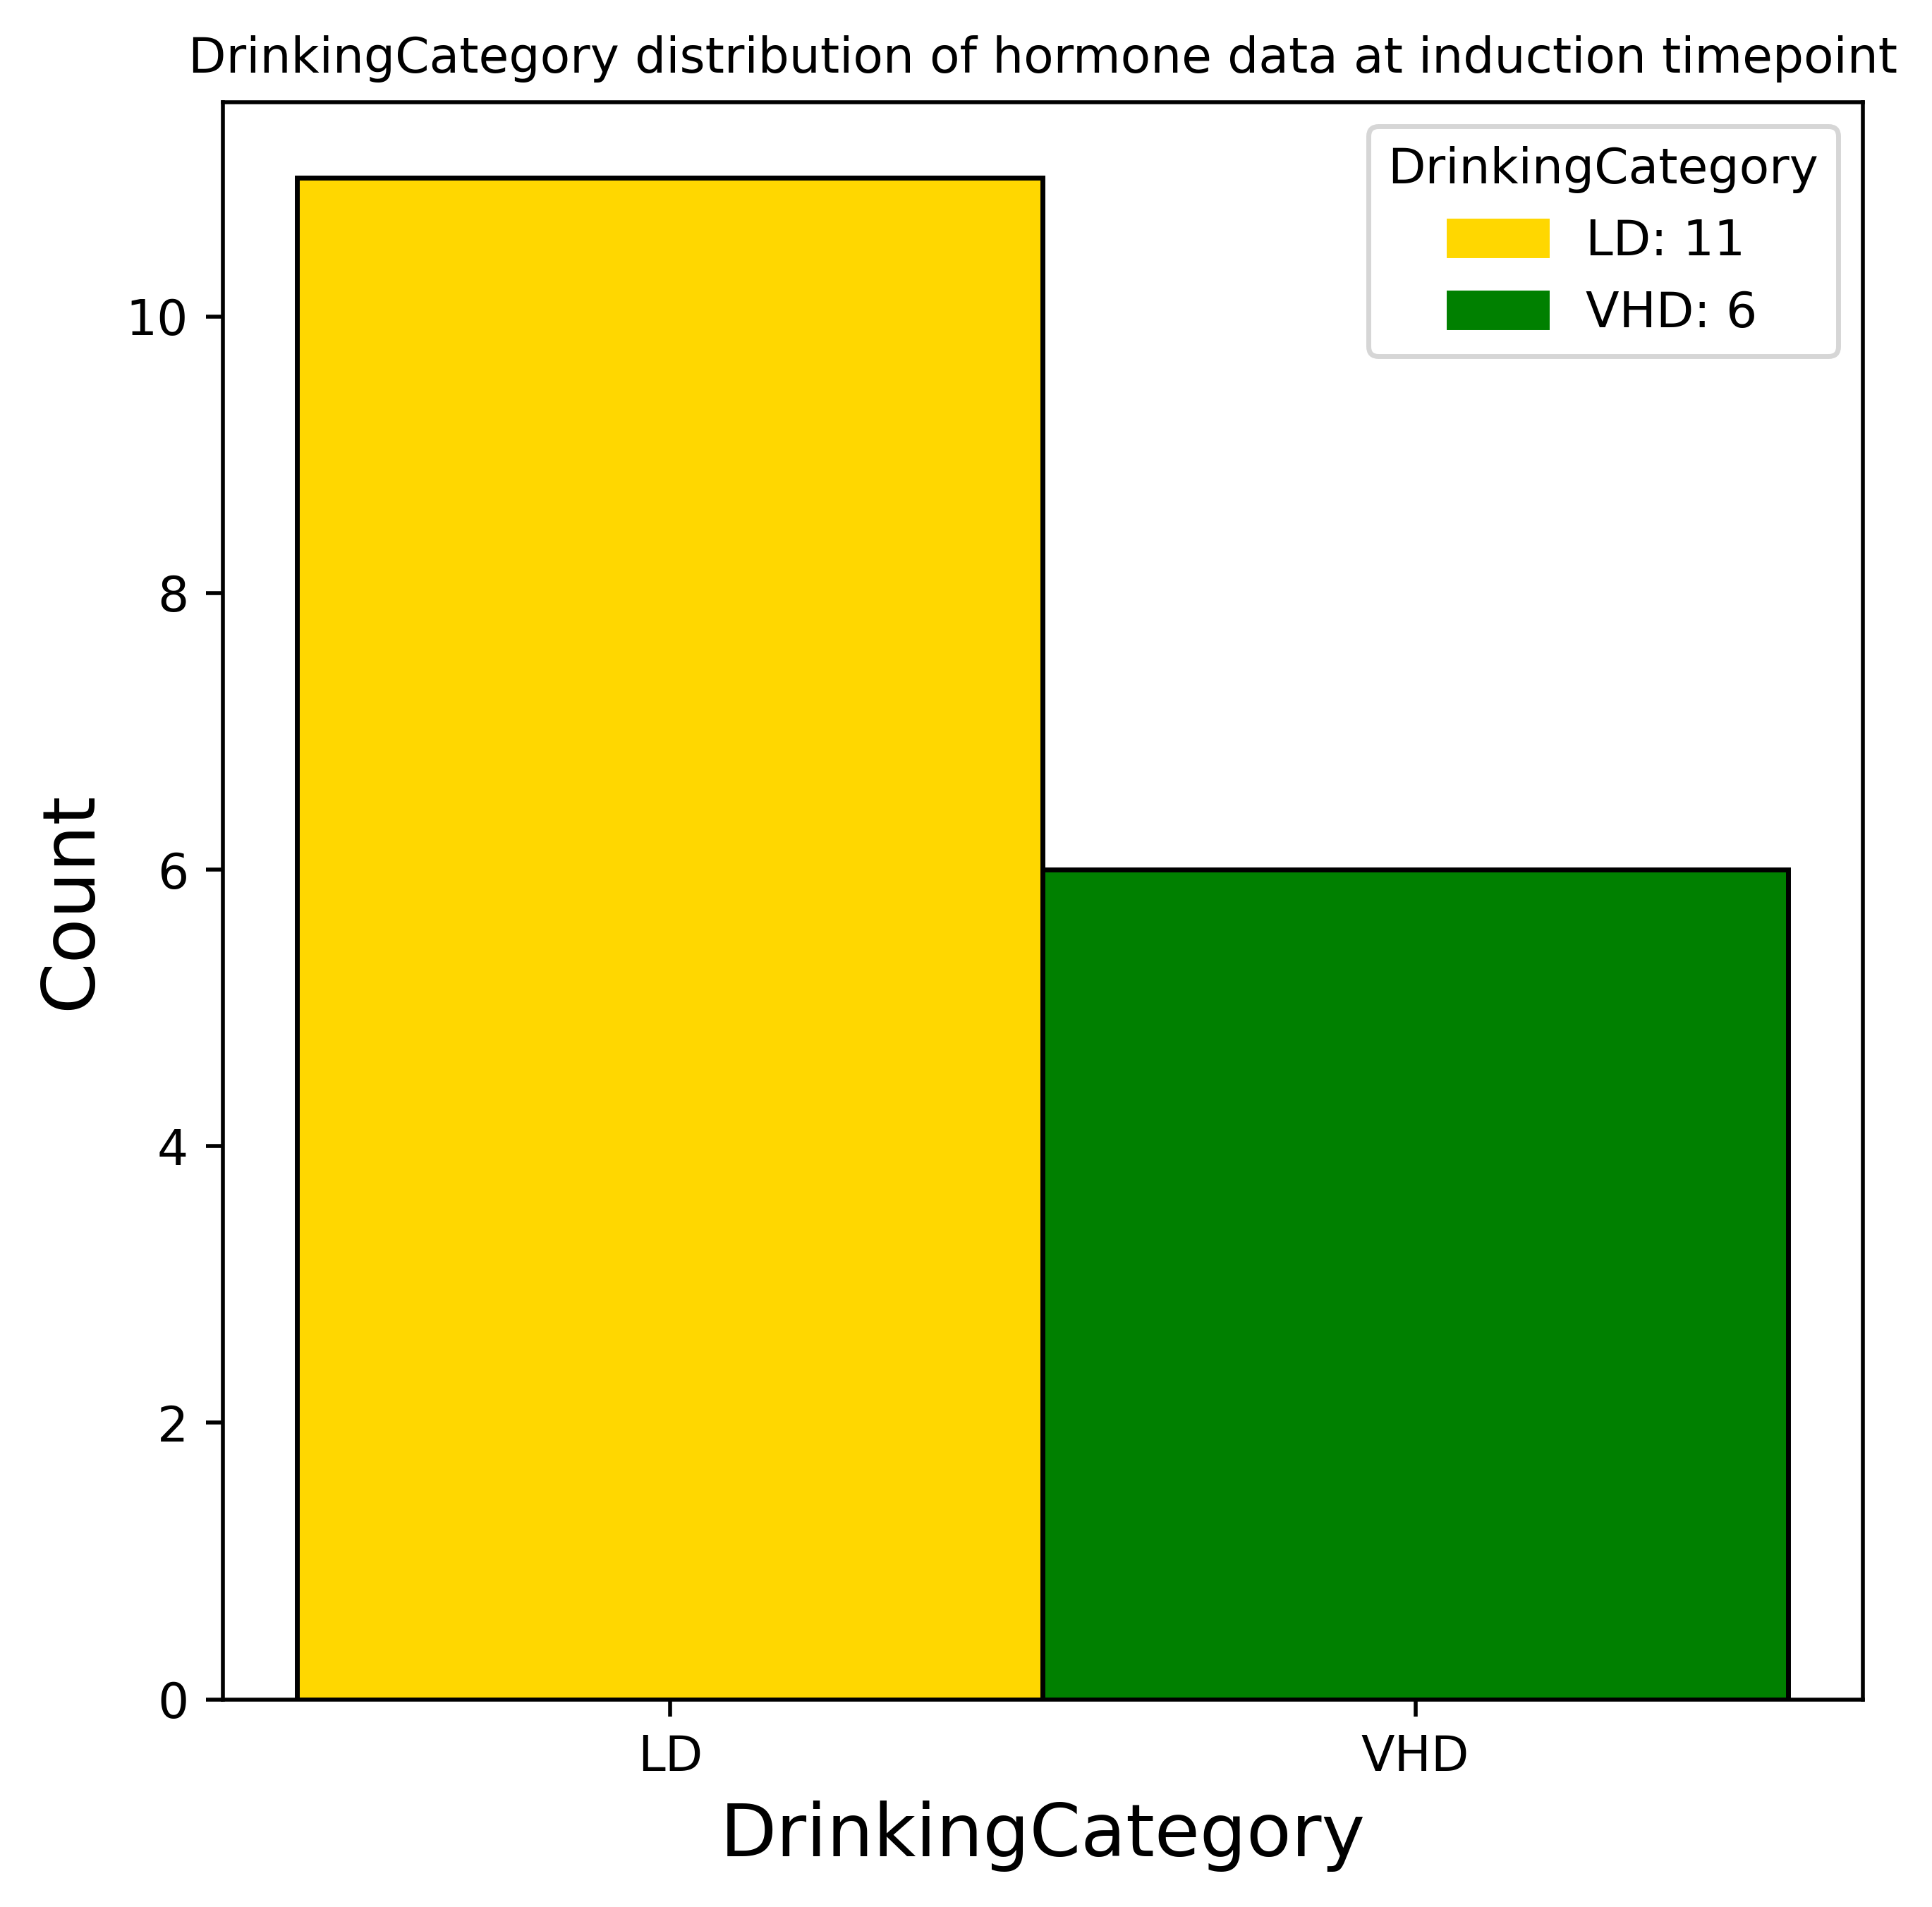

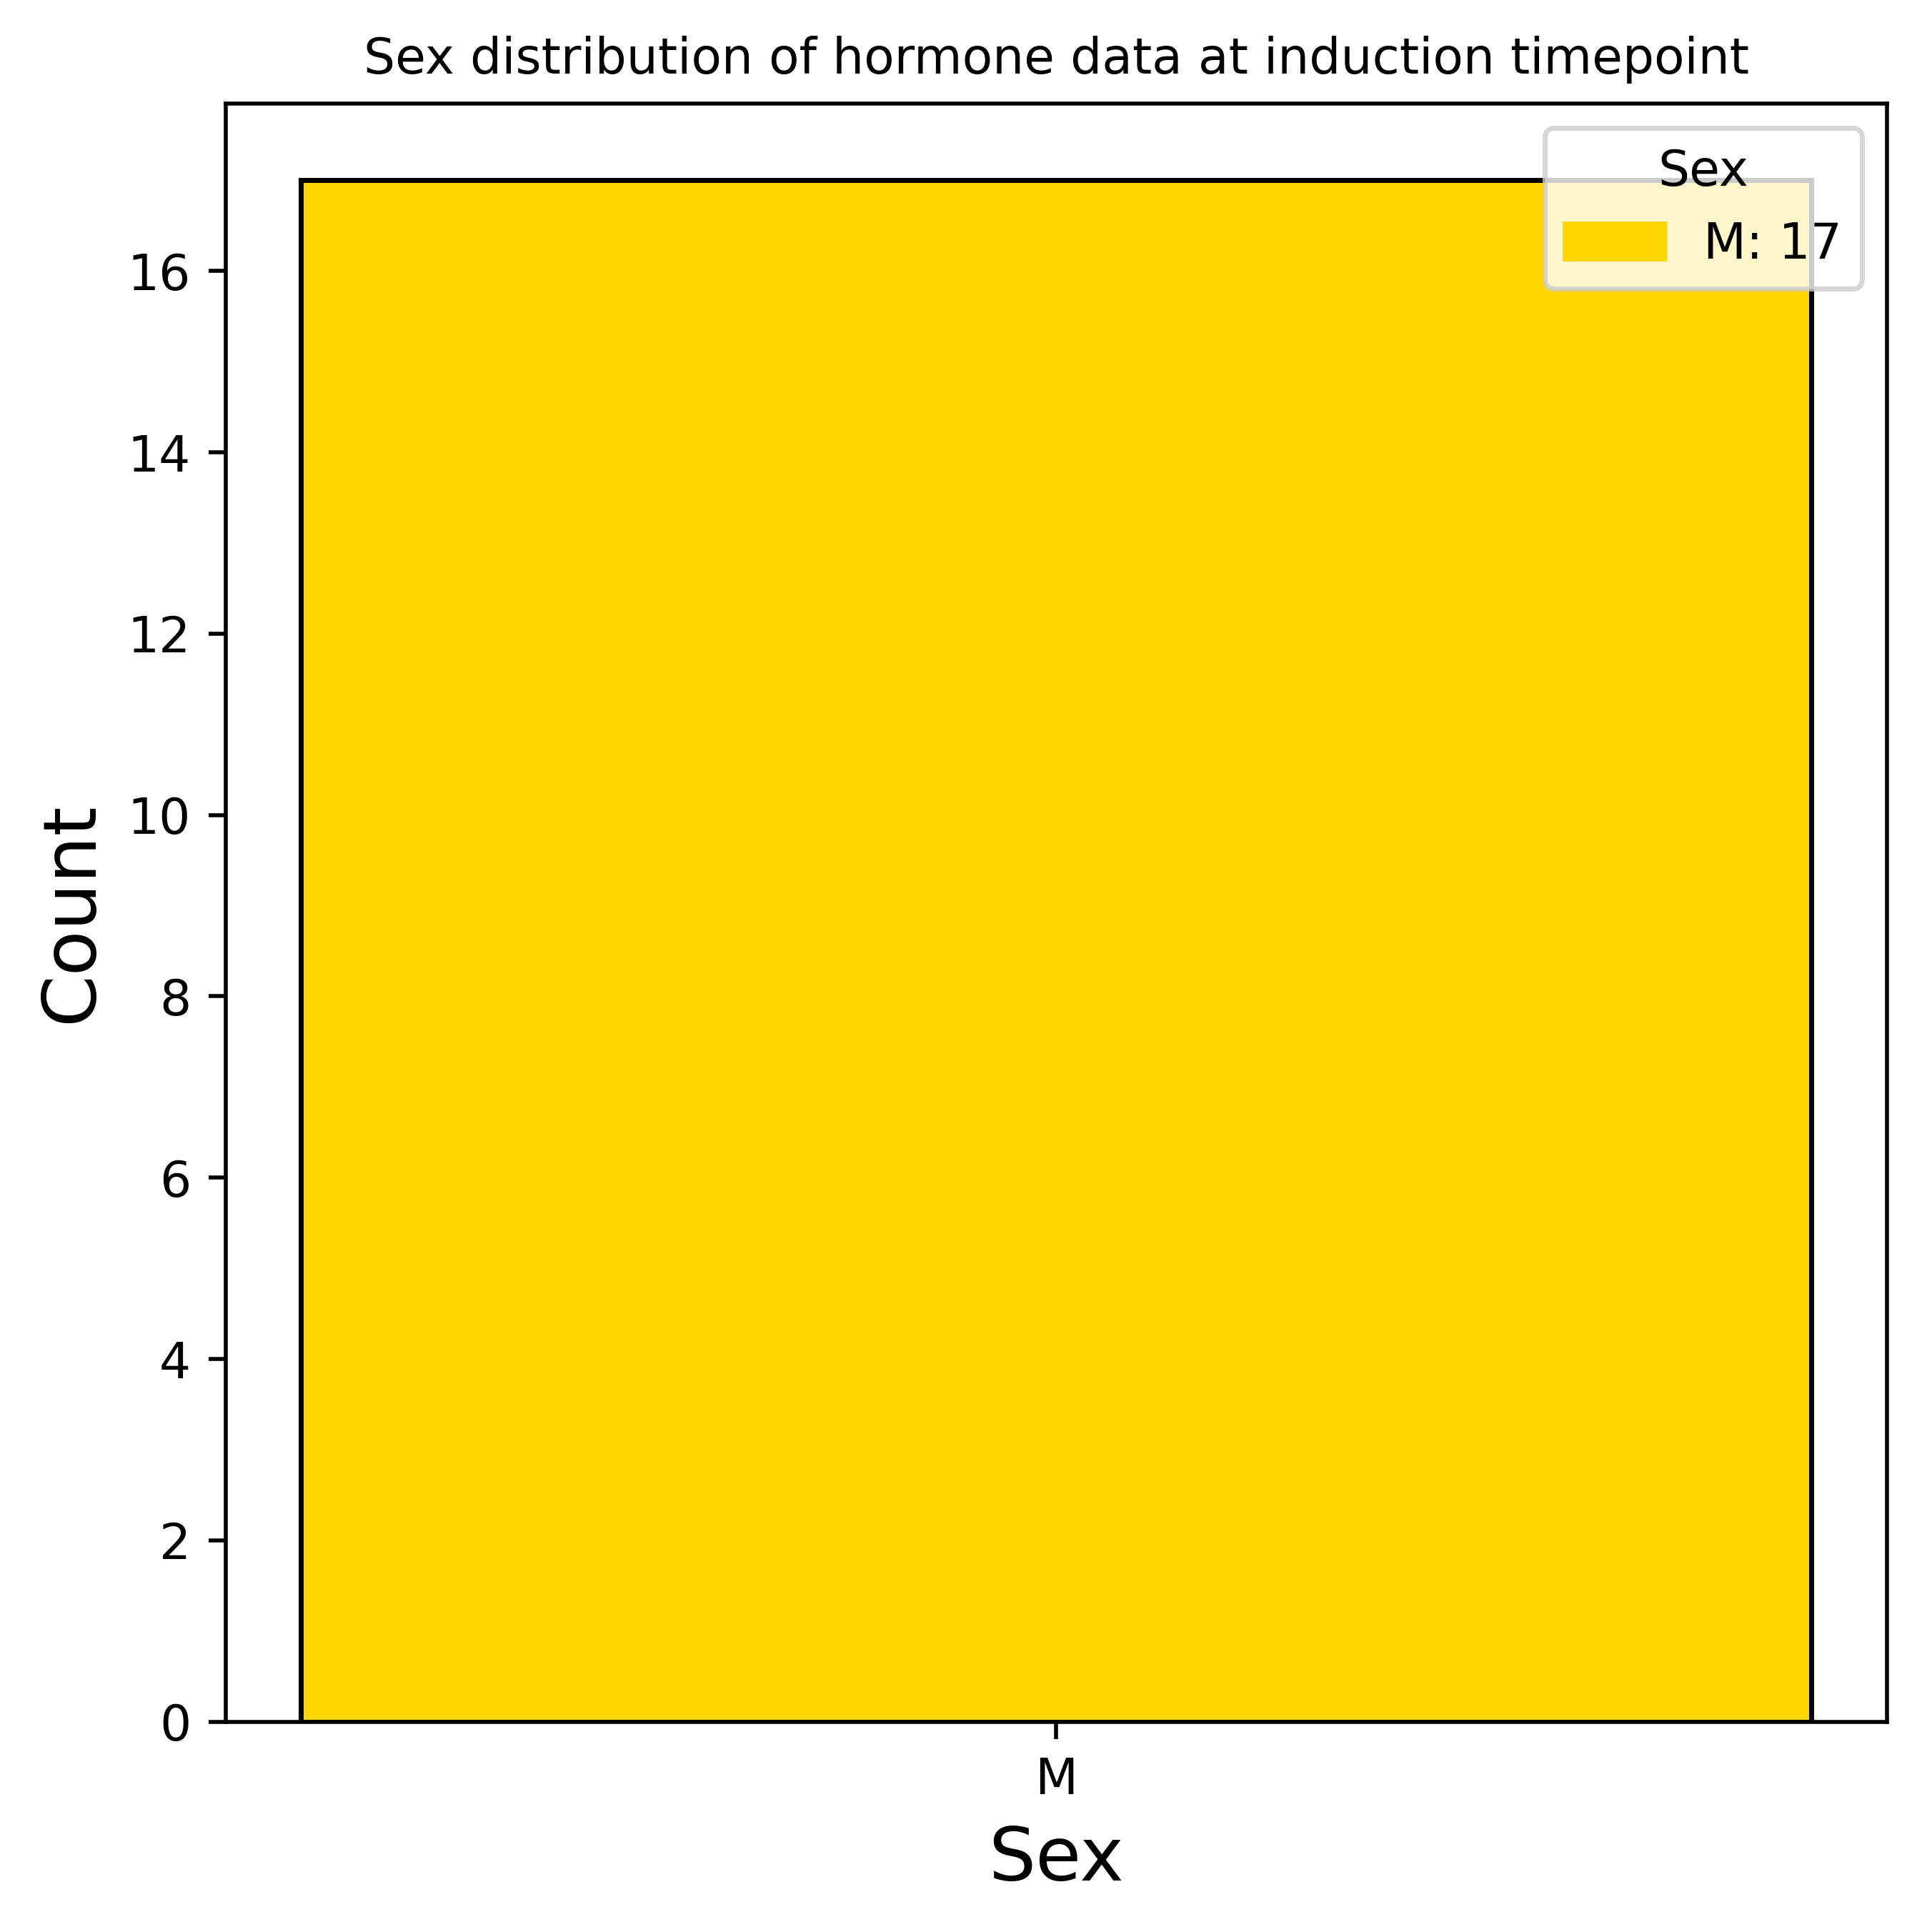

In [3]:
# Initial data analysis
Hormone_columns = ['ID','DrinkingCategory','Species','Sex','Age', 'Cortisol', 'ACTH', 'Testosterone', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX']
df = pd.read_table(data_path)
print(f"The total number of NHPs and features:  {df.shape}.")
df = df.filter(Hormone_columns).dropna().query("DrinkingCategory in ['LD', 'VHD']")
df = df.reset_index(drop=True)

plt.figure(figsize=(6, 6), dpi=500)
plt.hist(df['Age'], bins=10, edgecolor='black', color='gold')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Age distribution of hormone data at induction timepoint',fontsize=10)
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1.5, label=f'Mean Age: {mean_age:.2f}')
plt.legend(fontsize=10)
plt.savefig("/Users/nises/Desktop/figures/demo/induction_hormone_age.pdf")
plt.show()

plt.figure(figsize=(6, 6), dpi=500)
colors = ['gold', 'green']
ax = sns.histplot(data=df, x='DrinkingCategory', bins=2, edgecolor='black')
plt.xlabel('DrinkingCategory', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('DrinkingCategory distribution of hormone data at induction timepoint',fontsize=10)
dc_counts = df['DrinkingCategory'].value_counts()
for bar, color, count in zip(ax.containers[0], colors, dc_counts):
    bar.set_facecolor(color)
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom', color='white')
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=f'{dc}: {count}') for dc, color, count in zip(dc_counts.index, colors, dc_counts)]
plt.legend(handles=legend_handles, title='DrinkingCategory', loc='upper right')
# plt.savefig("")
plt.show()

plt.figure(figsize=(6, 6), dpi=500)
colors = ['gold', 'green']
ax = sns.histplot(data=df, x='Sex', bins=2, edgecolor='black')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Sex distribution of hormone data at induction timepoint',fontsize=10)
sex_counts = df['Sex'].value_counts()
for bar, color, count in zip(ax.containers[0], colors, sex_counts):
    bar.set_facecolor(color)
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom', color='white')
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=f'{sex}: {count}') for sex, color, count in zip(sex_counts.index, colors, sex_counts)]
plt.legend(handles=legend_handles, title='Sex', loc='upper right')
# plt.savefig("")
plt.show()

# Correlation Analysis

The total number of LD and VHD NHPs and features:  (17, 13).
The mean age of NHPs:  6.161096032470589.
Species count: Rhesus: 17
Sex count: M: 17
Drinking category count: LD: 11
Drinking category count: VHD: 6
Highly correlated pairs of features: []


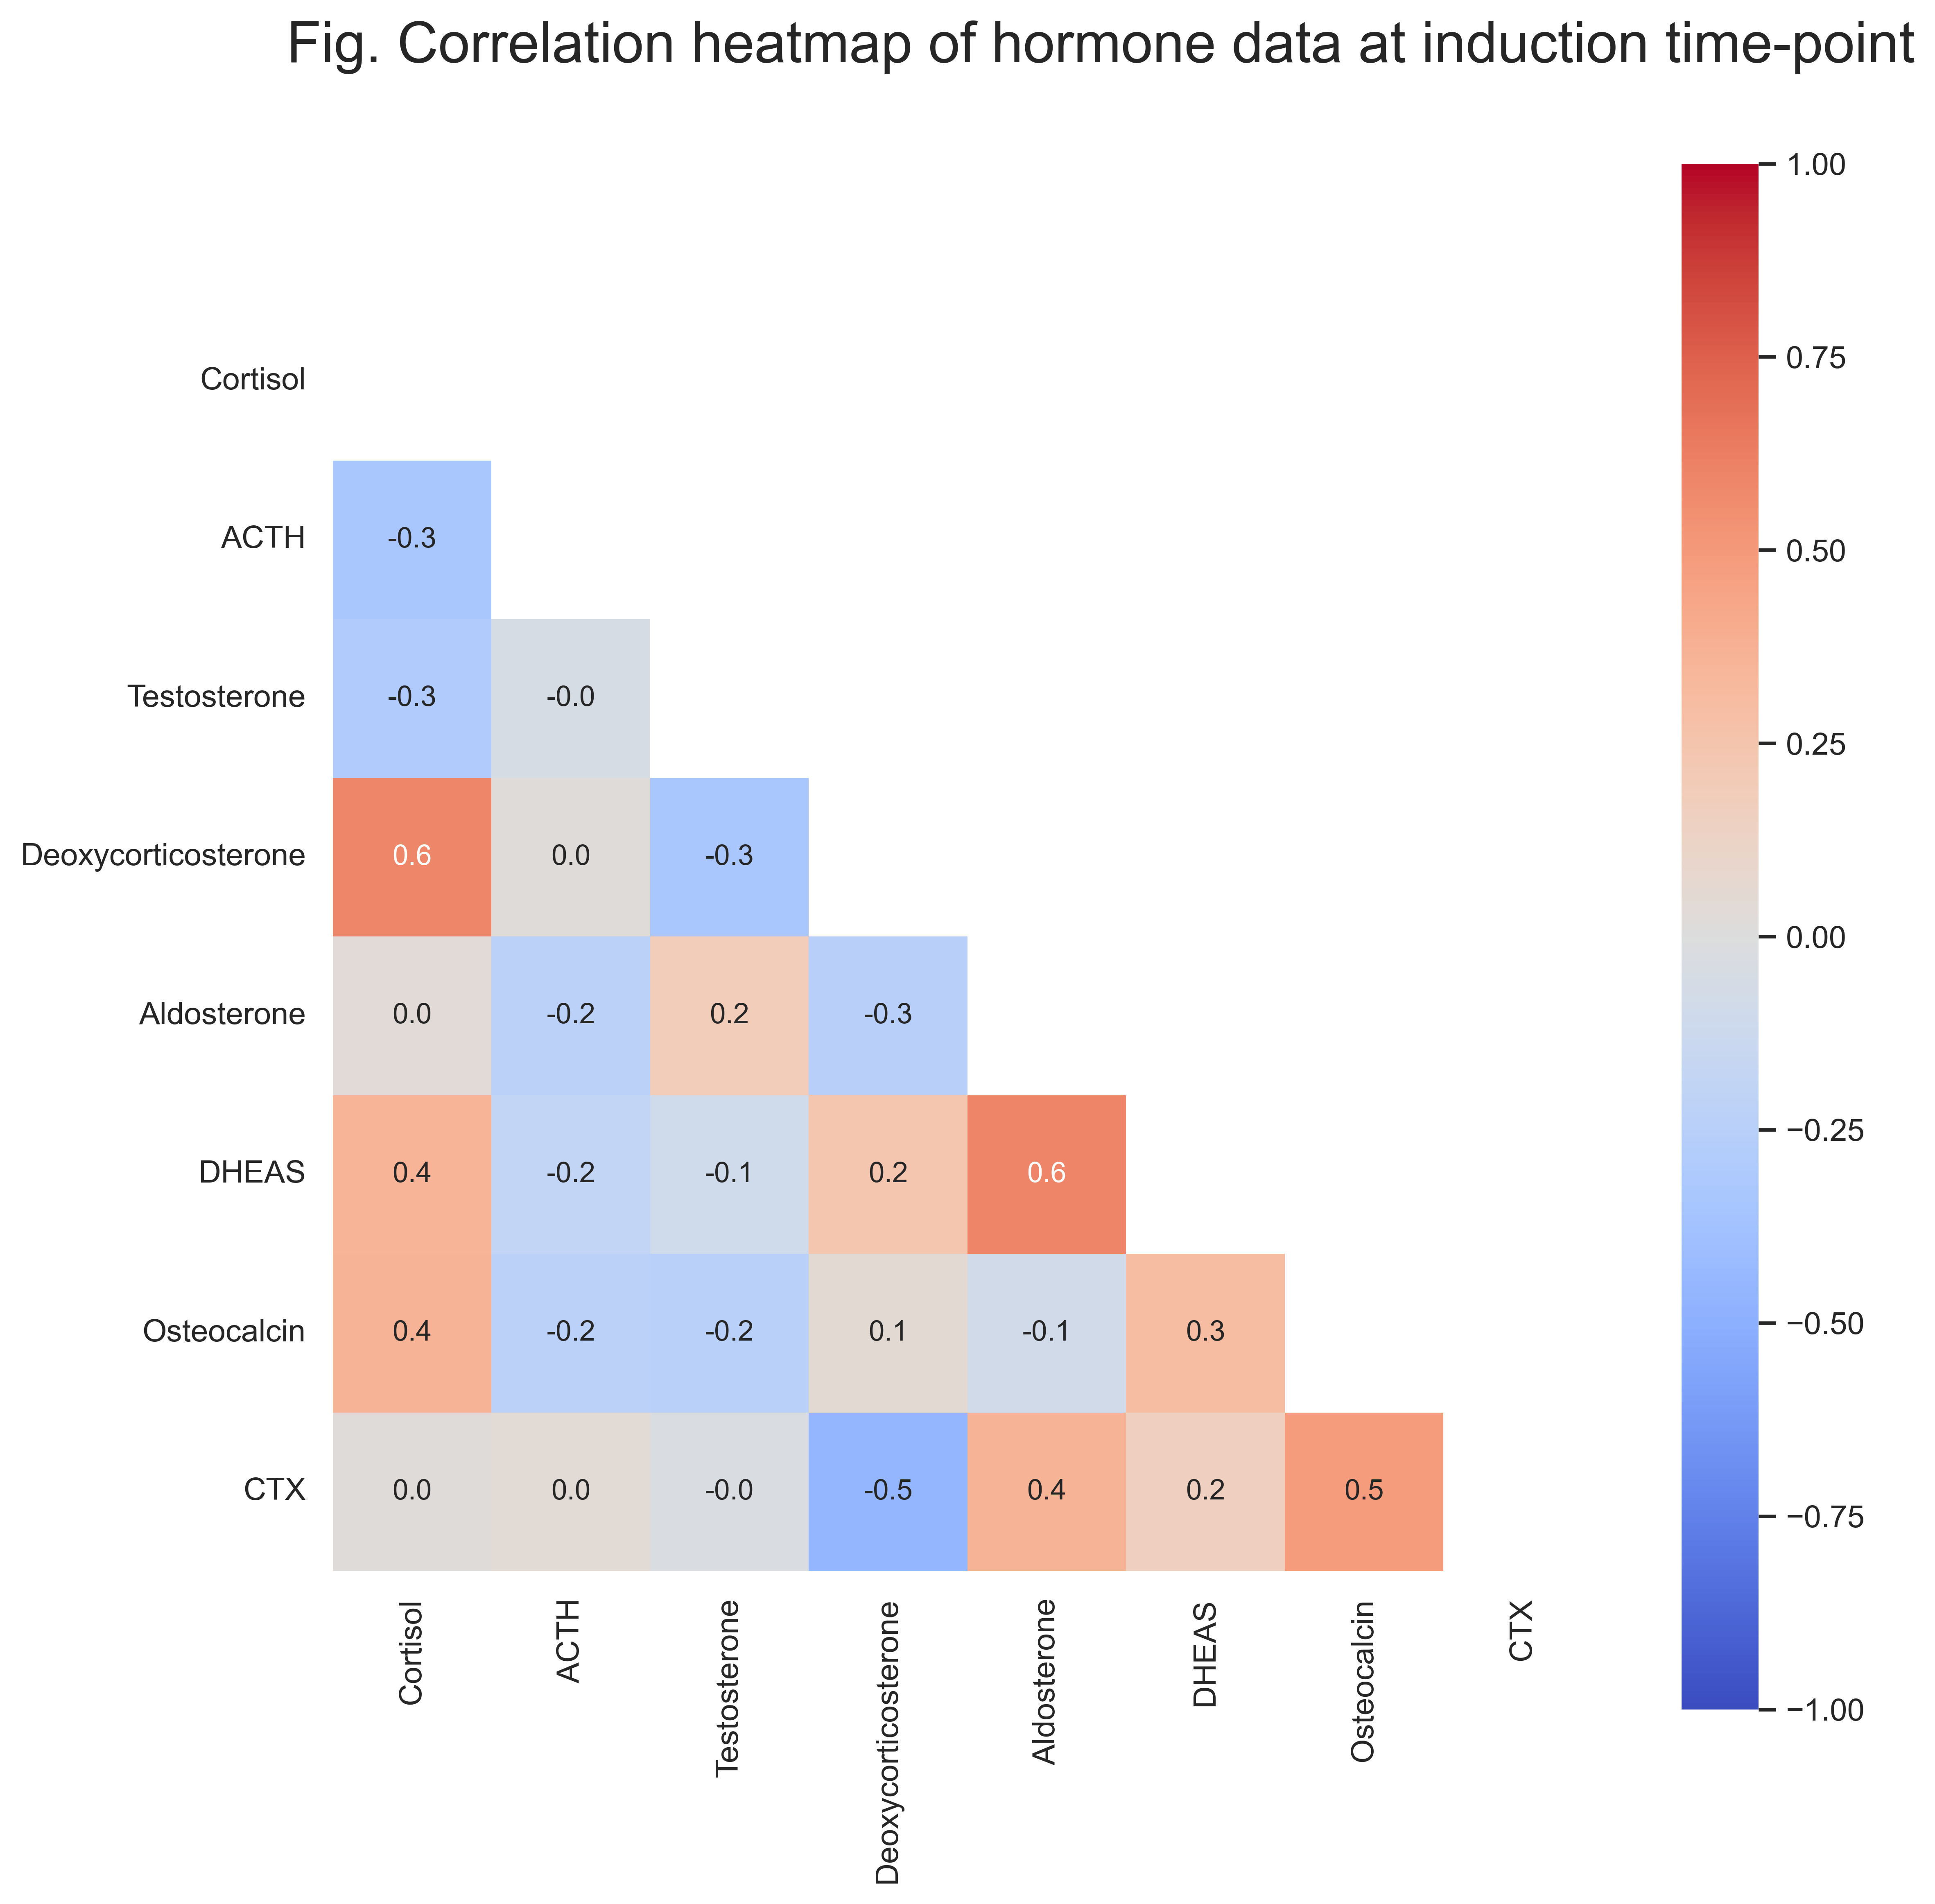

In [4]:
# Load your dataframe
Hormone_columns = ['ID','DrinkingCategory','Species','Sex','Age', 'Cortisol', 'ACTH', 'Testosterone', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX']
df = pd.read_table(data_path)
df = df.filter(Hormone_columns).dropna().query("DrinkingCategory in ['LD','VHD']")
df = df.reset_index(drop=True)

print(f"The total number of LD and VHD NHPs and features:  {df.shape}.")
print(f"The mean age of NHPs:  {df['Age'].mean()}.")

species_counts = df['Species'].value_counts()
for index, count in species_counts.iteritems():
    print(f"Species count: {index}: {count}")
    
sex_counts = df['Sex'].value_counts()
for index, count in sex_counts.iteritems():
    print(f"Sex count: {index}: {count}")
    
dc_counts = df['DrinkingCategory'].value_counts()
for index, count in dc_counts.iteritems():
    print(f"Drinking category count: {index}: {count}")

# Select the columns you want to include in the correlation analysis
cols = ['Cortisol', 'ACTH', 'Testosterone', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX']

# normalizer = Normalizer()
# xn1 = normalizer.fit_transform(df[cols])
# xc1 = pd.DataFrame(xn1, columns=cols)
# corr_matrix = xc1.corr()

corr_matrix = df[cols].corr()


# Identify highly correlated pairs of features
high_corr = corr_matrix[(abs(corr_matrix) >= 0.9) & (corr_matrix < 1.0)]
high_corr_pairs = [(high_corr.index[x], high_corr.columns[y]) for x, y in zip(*np.where(high_corr.notnull()))]
print("Highly correlated pairs of features:", high_corr_pairs)

plt.figure(figsize=(10, 10), dpi=500)
sns.set(font_scale=1)
sns.set_style("white")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, square=True, annot=True, fmt=".1f", annot_kws={"fontsize":10})
plt.suptitle('Fig. Correlation heatmap of hormone data at induction time-point', fontsize=20, y=0.95)
# plt.savefig("")
plt.show()


# K-Means clustering primates hormone induction

(17, 13)
[0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


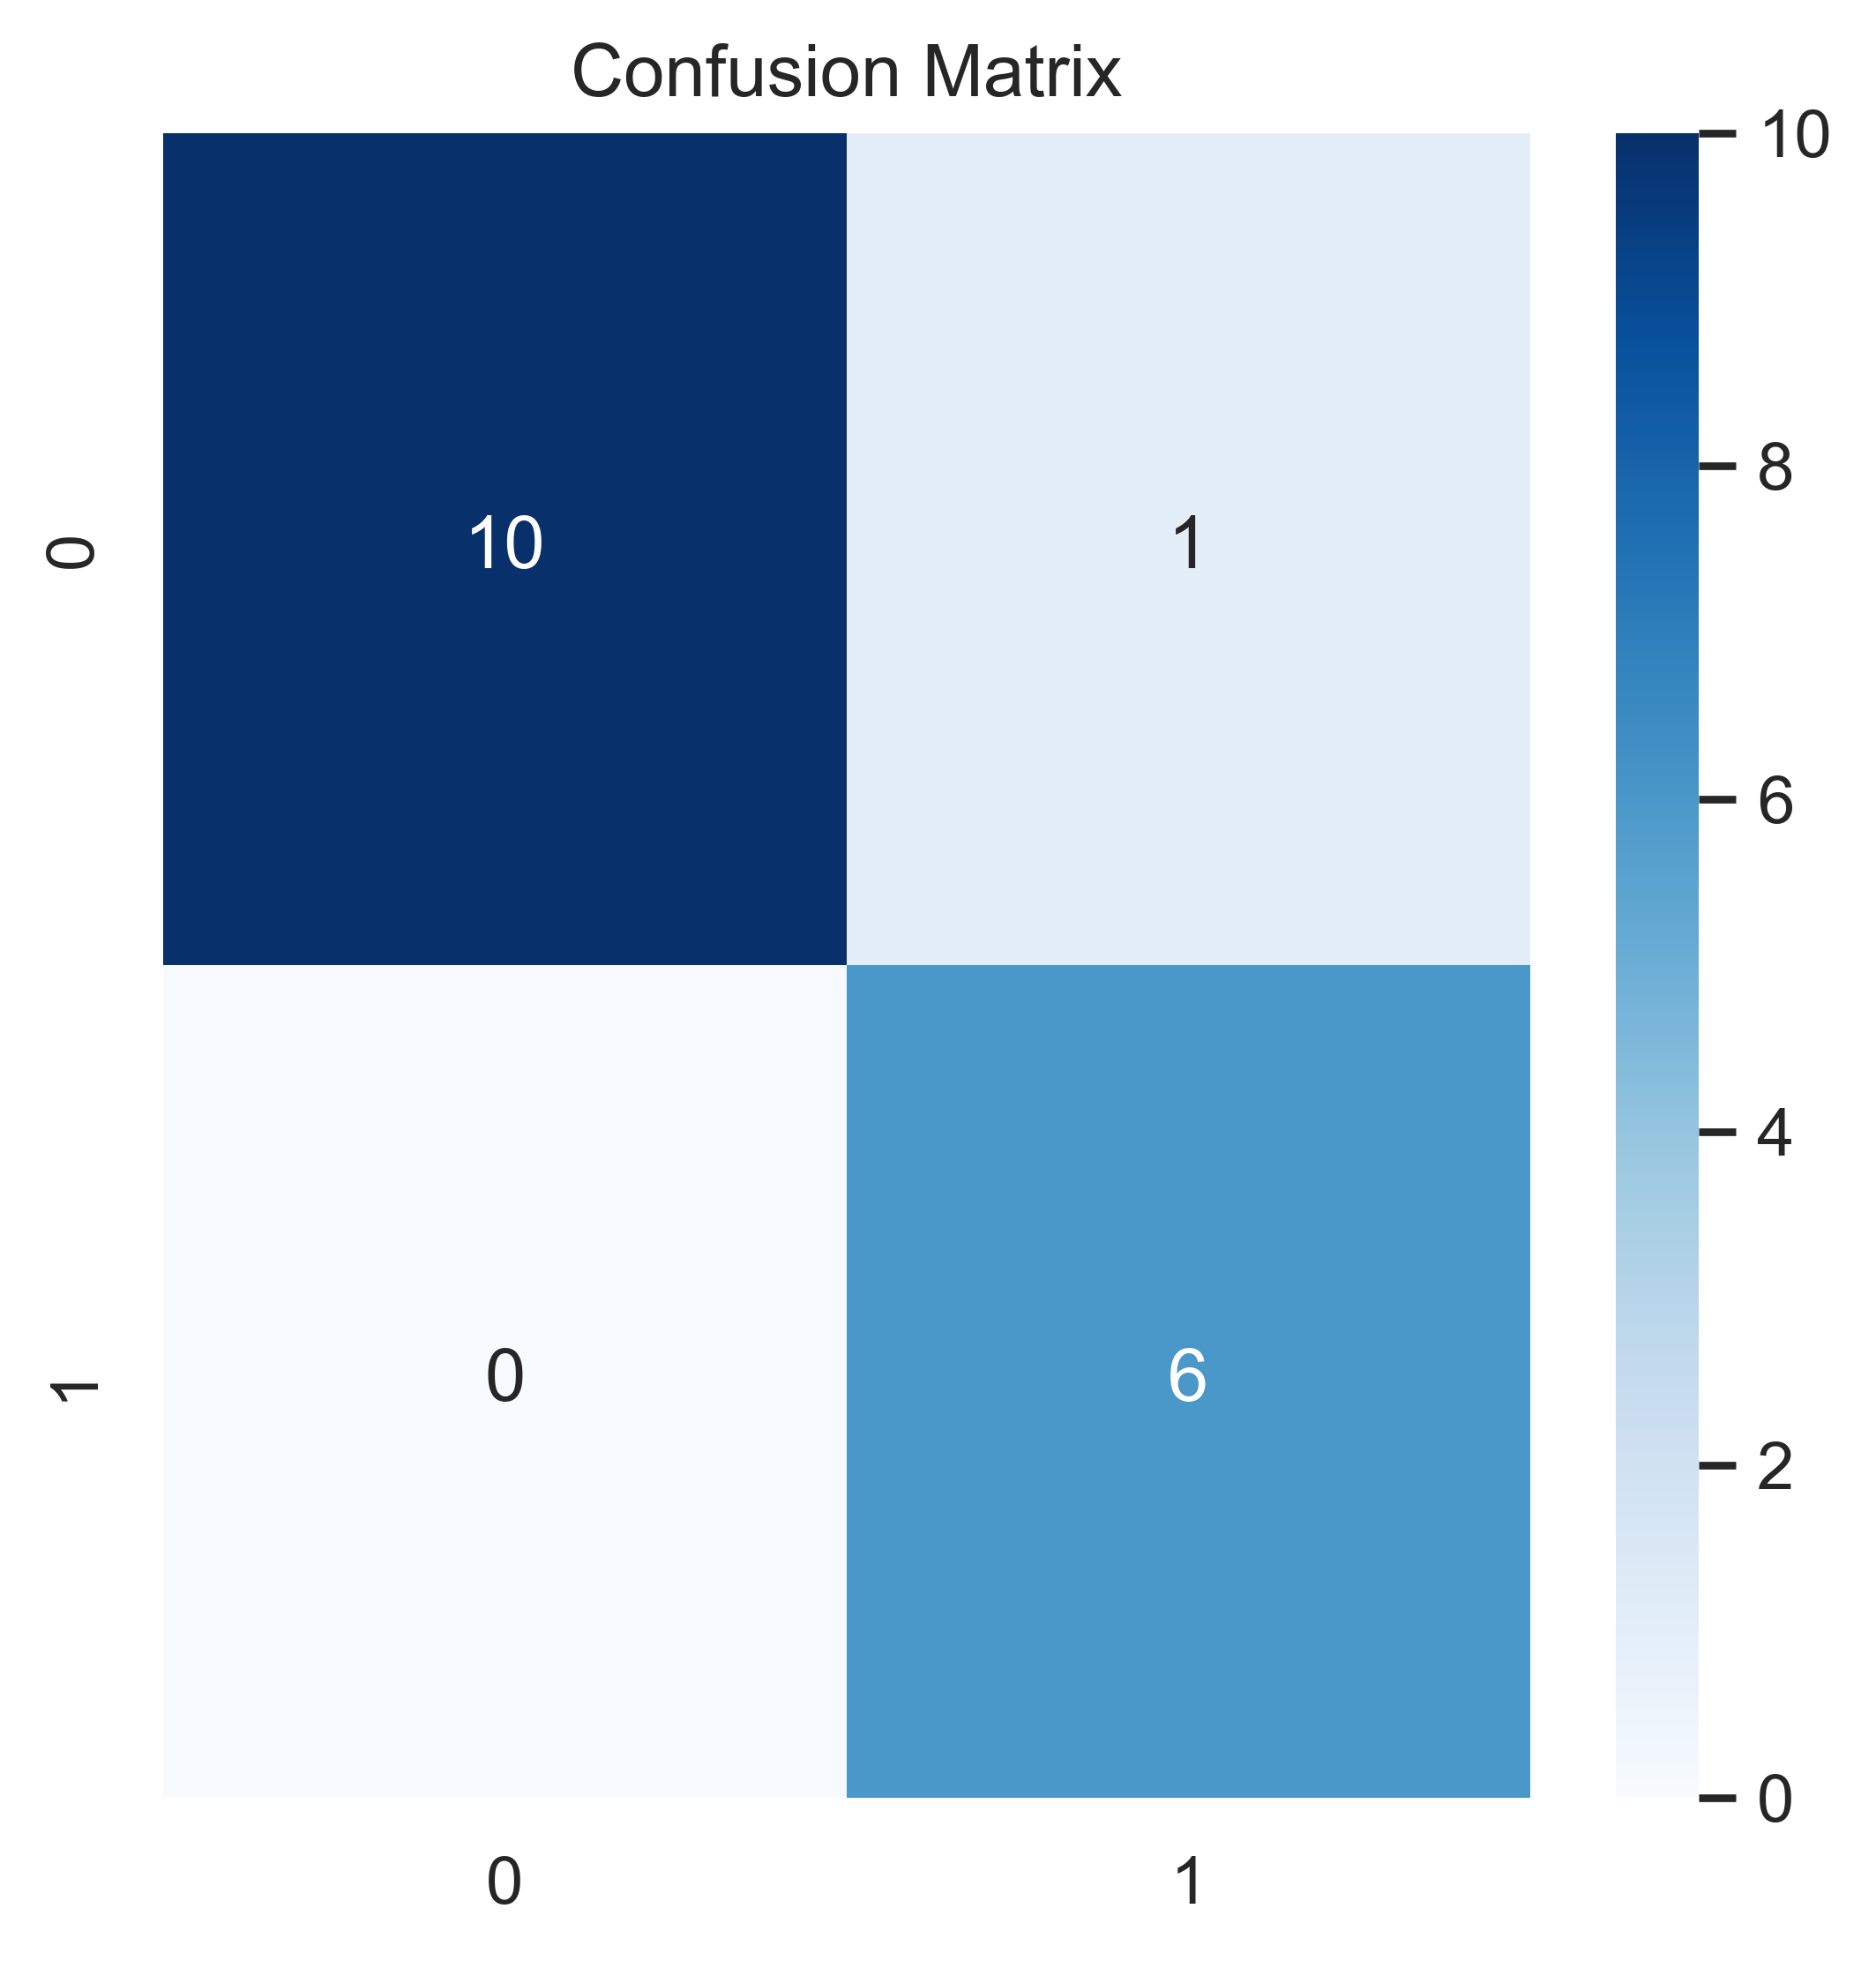

Accuracy of k-means: 0.94
Feature Importances:
Cortisol: 0.21
ACTH: 0.17
Deoxycorticosterone: 1.67
Aldosterone: 0.92
DHEAS: 0.00
Osteocalcin: 0.12
CTX: 0.01


<Figure size 432x288 with 0 Axes>

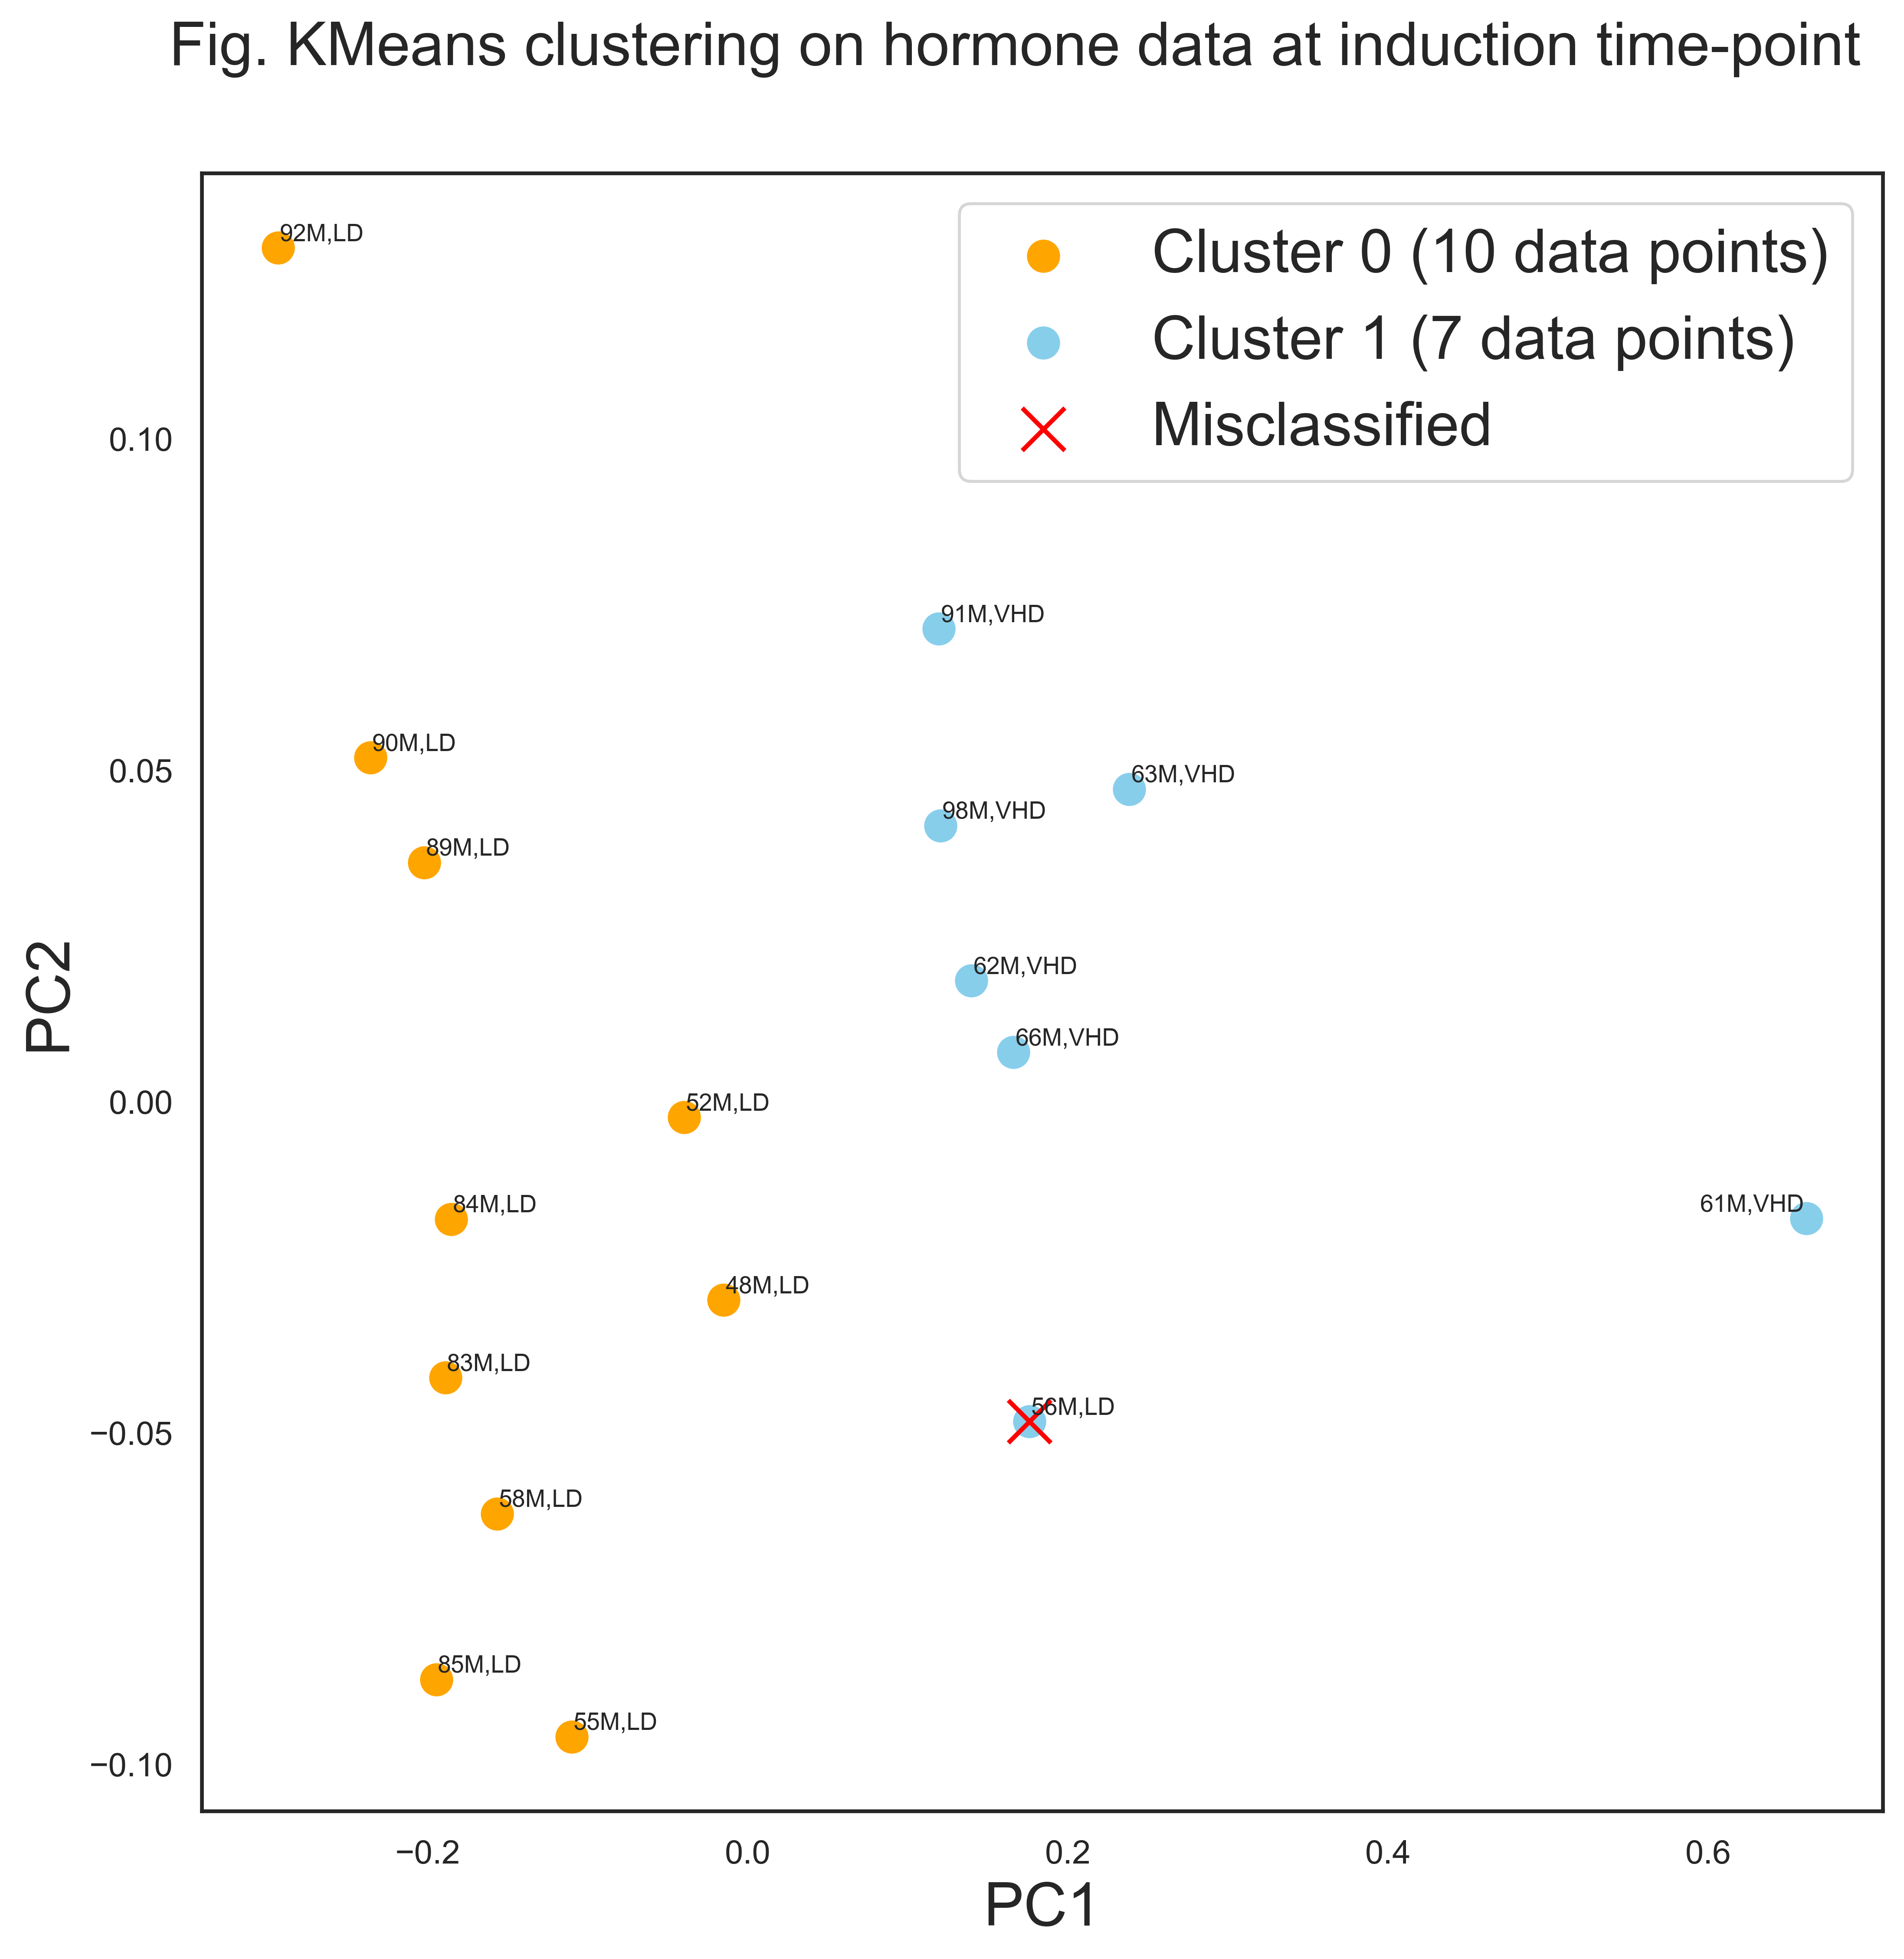

<Figure size 432x288 with 0 Axes>

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from collections import Counter
from sklearn.metrics import confusion_matrix

# Define the hormone columns and read the data into a DataFrame
Hormone_columns = ['ID', 'DrinkingCategory', 'Species', 'Sex', 'Age', 'Cortisol', 'ACTH', 'Testosterone', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX']
df = pd.read_table(data_path)
df = df.filter(Hormone_columns).dropna().query("DrinkingCategory in ['LD', 'VHD']")
df = df.reset_index(drop=True)
print(df.shape)

# Select the columns for analysis
cols = ['Cortisol', 'ACTH', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX']

# Select the features and target variable
X = df[cols]
y1 = df['DrinkingCategory'].isin(['VHD', 'HD']).astype(int)
y2 = df['DrinkingCategory'].isin(['LD', 'BD']).astype(int)

# Normalize the features
normalizer = Normalizer()
X_std = normalizer.fit_transform(X)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2)
predicted_label = kmeans.fit_predict(X_std)
print(predicted_label)

# Add new columns called target_label1 and target_label2
df['target_label1'] = y1
df['target_label2'] = y2

# Calculate the accuracy of k-means
accuracy1 = accuracy_score(predicted_label, df['target_label1'])
accuracy2 = accuracy_score(predicted_label, df['target_label2'])
accuracy = max(accuracy1, accuracy2)

# Determine the target labels for the confusion matrix based on the maximum accuracy
target_labels = df['target_label1'] if accuracy == accuracy1 else df['target_label2']

# Generate the confusion matrix
cm = confusion_matrix(target_labels, predicted_label)
plt.figure(figsize=(5, 5), dpi=500)
# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.title('Confusion Matrix')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/Users/nises/Desktop/figures/induction_hormone_cm.pdf")

print(f"Accuracy of k-means: {accuracy:.2f}")

# Find misclassified points based on the maximum accuracy
if accuracy == accuracy1:
    misclassified_points = np.where(predicted_label != df['target_label1'])[0]
else:
    misclassified_points = np.where(predicted_label != df['target_label2'])[0]

# Print out the feature importances based on the k-means model, along with the feature names
feature_importances = list(zip(cols, kmeans.cluster_centers_.sum(axis=0)))
print(f"Feature Importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.2f}")

# Perform PCA to project the data onto a 2D space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Set colors for the data points
colors = ['orange' if label == 0 else 'blue' for label in predicted_label]

# Plot the data points with different colors for each cluster and add annotations for modified ID and Sex
fig, ax = plt.subplots(figsize=(10, 10), dpi=500)

# Create separate scatter plots for each cluster label
for label, color in zip(set(predicted_label), ['orange', 'skyblue']):
    mask = predicted_label == label
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, s=100, label=f'Cluster {label} ({np.sum(mask)} data points)')

# Add cross marks for misclassified points
ax.scatter(X_pca[misclassified_points, 0], X_pca[misclassified_points, 1], marker='x', color='red', s=200, label='Misclassified')

annotations = []
for i, txt in enumerate(df['ID']):
    mod_id = str(txt)[-2:] + df['Sex'][i]
    annotations.append(ax.annotate(mod_id + ',' + df['DrinkingCategory'][i], (X_pca[i, 0], X_pca[i, 1]), fontsize=8, arrowprops=None))

adjust_text(annotations)


plt.legend(fontsize=20)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)

# Add figure title
plt.suptitle('Fig. KMeans clustering on hormone data at induction time-point', fontsize=20, y=0.95)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/Users/nises/Desktop/figures/induction_hormone_kmeans.pdf")
